In [62]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import plotly.graph_objects as go

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">ABSTRACT</h1></center>
</div> 

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">INTRODUCTION</h1></center>
</div> 

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Background</h2></center>
</div> 

In an era where data-driven decisions are pivotal to success, political campaigns are no exception. Recognizing the power of big data analytics to shape political strategies, this project leverages the Global Database of Events, Language, and Tone (GDELT) to extract actionable insights for future political leaders in the Philippines. By harnessing GDELT's extensive repository of media events and sentiment analyses, the project aims to distill the most pressing issues and public sentiments across the country. This approach ensures that campaign platforms are not only relevant but also resonant with the electorate’s current concerns and needs.

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Problem Statement</h2></center>
</div> 

In the digital age, the proliferation of disinformation, particularly through orchestrated campaigns via "troll farms", has emerged as a critical challenge in political campaigning across the Philippines and Southeast Asia. These deceptive practices not only distort public perceptions but also undermine the integrity of democratic processes by swaying voter opinions with false narratives. The difficulty lies in the ability of political campaigns to both identify and counteract these disinformation efforts effectively while also promoting genuine and fact-based discourse.

This project seeks to address the urgent need for sophisticated data-driven strategies that can discern and mitigate the impact of digital disinformation. Utilizing the extensive monitoring capabilities of GDELT to track media events and sentiment, the study aims to equip political leaders with the tools to identify trends and anomalies in public discourse that may indicate the presence of disinformation. By establishing more transparent and factually accurate communication strategies, aspiring political leaders can enhance their campaign platforms, foster a more informed electorate, and strengthen democratic resilience against the corrosive effects of misinformation.

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Objectives</h2></center>
</div> 

The goal of this study is to delve deeper into the information provided generously through the GDELT Project and help assist leaders in pivoting their goals and strategies accordingly. 
The objectives of this is study are as follows: 
1. asdasd
2. asdasd
3. asdasd

<div id="data-sources-description" style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">DATA SOURCES AND DESCRIPTION</h1></center>
</div>

The **GDELT (Global Data of Events, Language, and Tone) Project** is a comprehensive global monitoring system that tracks news content from broadcasters, print media, and websites in numerous languages across almost every country in the world. It employs advanced techniques to identify and extract key elements driving global discourse and events, such as people, locations, organizations, topics, sources, sentiments, numerical data, quotations, images, and events. By continuously processing this immense stream of information on a second-by-second basis, GDELT generates a freely accessible open data platform that enables computational analysis of the world's events, narratives, and societal forces in real-time.

GDELT has several [datasets](https://www.gdeltproject.org/data.html). This study specifically uses the **Global Knowledge Graph** (GKG) dataset. GKG enables the representation of the underlying dimensions, geographic patterns, and network structures inherent in global news coverage. It uses sophisticated natural language processing algorithms to compute and encode a  range of codified metadata that captures the latent and contextual aspects of each document. In essence, the GKG interconnects every person, organization, location, numerical data, theme, news source, and event across the globe into a massive unified network. This network captures what is happening worldwide, the associated contexts and involved entities, as well as the sentiments surrounding these events, providing a daily comprehensive view of our global society.

The dataset has the following fields:

| Field Name                    | Description |
|-------------------------------|-------------|
| GKGRECORDID                   | Each GKG record is assigned a globally unique identifier in a date-oriented serial number format. |
| V2.1DATE                      | The publication date of the news media used to construct the GKG file, in YYYYMMDDHHMMSS format. |
| V2SOURCECOLLECTIONIDENTIFIER  | A numeric identifier specifying the source collection the document came from. |
| V2SOURCECOMMONNAME            | A human-friendly identifier of the source of the document. |
| V2DOCUMENTIDENTIFIER          | The unique external identifier for the source document. |
| V1COUNTS                      | A semicolon-delimited list of counts found in the document, each separated by the pound symbol. |
| V2.1COUNTS                    | Similar to V1COUNTS but includes character offsets for each count. |
| V1THEMES                      | A semicolon-delimited list of all themes found in the document. |
| V2ENHANCEDTHEMES              | Includes all GKG themes referenced in the document along with character offsets. |
| V1LOCATIONS                   | A semicolon-delimited list of all locations found in the text, extracted using the Leetaru algorithm. |
| V2ENHANCEDLOCATIONS           | Similar to V1LOCATIONS but includes an extra field for character offsets and additional details. |
| V1PERSONS                     | A semicolon-delimited list of all person names found in the text. |
| V2ENHANCEDPERSONS             | Includes all person names referenced in the document along with character offsets. |
| V1ORGANIZATIONS               | A semicolon-delimited list of all company and organization names found in the text. |
| V2ENHANCEDORGANIZATIONS       | Includes all organizations/companies referenced in the document along with character offsets. |
| V1.5TONE                      | A list of six core emotional dimensions, each recorded as a single precision floating point number. |
| V2.1ENHANCEDDATES             | Contains a list of all date references in the document, along with character offsets. |
| V2GCAM                        | The Global Content Analysis Measures field, runs an array of content analysis systems over each document. |
| V2.1SHARINGIMAGE              | Specifies a "sharing image" for each article as specified by news websites. |
| V2.1RELATEDIMAGES             | A list of URLs of images deemed most relevant to the core story of the article. |
| V2.1SOCIALIMAGEEMBEDS         | A list of URLs of image-based social media posts embedded in articles. |
| V2.1SOCIALVIDEOEMBEDS         | A list of URLs of videos embedded in articles from various platforms like YouTube, Vimeo, etc. |
| V2.1QUOTATIONS                | Extracts and segments all quoted statements from each article. |
| V2.1ALLNAMES                  | Contains a list of all proper names referenced in the document, along with character offsets. |
| V2.1AMOUNTS                   | Contains a list of all precise numeric amounts referenced in the document, along with character offsets. |
| V2.1TRANSLATIONINFO           | Records provenance information for machine translated documents. |
| V2EXTRASXML                   | Reserved to hold special non-standard data applicable to special subsets of the GDELT collection. |


The study extracted insights using these columns mainly: `V1COUNTS`, `V1THEMES`, `V1LOCATIONS`. Further information on `V1COUNTS` and `V1THEMES` are elaborated below:

**`V1COUNTS`**
- Sample: `["ARREST#400#political#4#Rossiya, Orenburgskaya Oblast', Russia#RS#RS55#52.4#54.9833#-2993111;"]`
- This is the value of the NAME field from the Category List spreadsheet indicating which category this count is of. At the time of this writing, this is most often` AFFECT`, `ARREST`, `KIDNAP`, `KILL`, `PROTEST`, `SEIZE`, or `WOUND`, though other categories may appear here as well in certain circumstances when they appear in context with one of these categories, or as other Count categories are added over time. A value of “PROTEST” in this field would indicate that this is a count of the number of protesters at a protest.
- Short description of the count types:
| Count Type | Description |
|------------|-------------|
| `AFFECT`     | This broad category captures everything from being sickened to refugees, evacuations, displaced persons, stranded, etc |
| `ARREST`     | Discussion of someone being arrested, detained, jailed, imprisoned, etc |
| `DISPLACED`  | This category counts mentions of people being displaced - see REFUGEES for counts of refugees, forced migration, and related |
| `EVACUATION` | Mentions of evacuations |
| `KIDNAP`     | Someone being kidnapped, abducted, hostages, etc |
| `KILL`       | Any mention of something dying |
| `PROTEST`   | Discussion of protesting, demonstrating, rioting, striking, activists, agitators, etc |
| `REFUGEES`   | Refugees, displaced persons, forced migration, asylum seekers |
| `SEIZE`      | Something being seized (often drugs, illegal materials, etc) |
| `SICKENED`   | This category counts anything being sickened |
| `WOUND`      | Any mention of something being wounded or injured |

**`V1THEMES`**
- Sample: `SELF_IDENTIFIED_HUMAN_RIGHTS;FREESPEECH;POLITICAL_PRISONER;PROTEST;MOVEMENT_GENERAL;`
- This is a [link](https://view.officeapps.live.com/op/view.aspx?src=http%3A%2F%2Fdata.gdeltproject.org%2Fdocumentation%2FGDELT-Global_Knowledge_Graph_CategoryList.xlsx&wdOrigin=BROWSELINK) to the description of the 284 themes in the dataset including the count types mentioned previously. However, this list is not exhaustive; some themes found in the dataset have no corresponding descriptions in the linked file and should be sourced externally. [This](https://blog.gdeltproject.org/crisislex-taxonomies-now-available-in-gkg/) is one example of such.
- Sample descriptions
| Theme                | Description |
|----------------------|-------------|
| `CORRUPTION`           | Corruption, kickbacks, embezzling, profiteering, etc |
| `CRIME_CARTELS`        | Primarily focused around mentions of drug cartels, drug corridors, etc. Does not currently have a list of cartels, just captures general discussion of them |
| `CRIME_COMMON_ROBBERY` | Discussion of general crime like pickpocketing, robbery, street criminals, etc |
| `CRIME_ILLEGAL_DRUGS`  | Mentions of illegal drugs |
| `CYBER_ATTACK`         | Any discussion of cyberwarfare, cyberattacks, phishing, hacking, hacktivists, viruses, etc |


<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">METHODOLOGY</h1></center>
</div> 

<b style='color:red'>Add date range and why—can be said that this is a prototype</b>

In [39]:
spark = (SparkSession
     .builder
     .master('local[*]') # Master URL;
     .getOrCreate())

In [42]:
df = spark.read.parquet("/home/msds2024/pmartinez/cpt1_shared/slt1a/bdcc"\
                            "/201610/parquets")

The GKG (Global Knowledge Graph) dataset has a total of  2,087,088 rows, and looks like the following:

*Note: Due to the voluminous nature of big data, the sample dataframes will be displayed in their transposed form for the reader to clearly see the columns being referenced*.

In [57]:
print(f"The dataset has {df.count()} rows.")
display(df.limit(1).toPandas().transpose())

The dataset has 2087088 rows.


,0
GKGRECORDID,20161006153000-0
V2.1DATE,20161006153000
V2SOURCECOLLECTIONIDENTIFIER,2
V2SOURCECOMMONNAME,BBC Monitoring
V2DOCUMENTIDENTIFIER,"Islamic Republic News Agency, Tehran/BBC Monit..."
V1COUNTS,None
V2.1COUNTS,None
V1THEMES,WB_2433_CONFLICT_AND_VIOLENCE;WB_2449_PARAMILI...
V2ENHANCEDTHEMES,"WB_2433_CONFLICT_AND_VIOLENCE,44;WB_2449_PARAM..."
V1LOCATIONS,None


Based on the [Data Sources and Description](#data-sources-description) section, we know that the GKG dataset has a nested or hierarchical structure where some columns contain multiple pieces of information separated by delimiters. This necessitates the need to denormalize or unnest these nested information elements to capture more comprehensive and granular insights.

In particular, we explode the following columns:
- `V1COUNTS`: To extract the count types (`KILL`, `ARREST`, `PROTEST`, etc.)
- `V1LOCATIONS`: To extract the region, country, longitude, and latitude
- `V1THEMES`: To extract all the themes of every discussion

The resulting dataframe after the explosion and removal of unneeded columns is as such:

In [48]:
df_final = (df
            .withColumn('CountType', F.regexp_extract('V1COUNTS',
                                                      r'^([^#]+)', 1))
            .withColumn('ExpandedLocation',
                        F.explode(F.split(F.regexp_extract('V1LOCATIONS',
                                                   r'(^|;)([^#]+#[^#]+#[^#]+)',
                                                   0), ";")))
            .withColumn('ExtractedLocation',
                        F.regexp_extract('ExpandedLocation',
                                         r'#([^#]+)#', 1))
            .withColumn('Region',
                        F.element_at(F.split(F.col('ExtractedLocation'),
                                             ', '), 1))
            .withColumn('Country',
                        F.element_at(F.split(F.col('ExtractedLocation'), ', '),
                             -1))  # Last element as Country
            .withColumn('Region',
                        F.when(F.col('Region') == F.col('Country'),
                               None).otherwise(F.col('Region')))
            .withColumn('Themes_Single',
                        F.explode(F.split(F.regexp_extract('V1THEMES',
                                                           r'([^;]+)',
                                                           0), ";")))
            .drop('ExpandedLocation', 'ExtractedLocation', 'GKGRECORDID',
                  'V2.1DATE', 'V2.1COUNTS', 'V2ENHANCEDTHEMES', 'V1PERSONS',
                  'V2ENHANCEDPERSONS', 'V1ORGANIZATIONS',
                  'V2ENHANCEDORGANIZATIONS', 'V2.1ENHANCEDDATES', 'V2GCAM',
                  'V2.1SHARINGIMAGE', 'V2.1RELATEDIMAGES',
                  'V2.1SOCIALIMAGEEMBEDS', 'V2.1SOCIALVIDEOEMBEDS',
                  'V2.1QUOTATIONS', 'V2.1ALLNAMES', 'V2.1AMOUNTS',
                  'V2.1TRANSLATIONINFO', 'V2EXTRASXML'
                 )
           )

In [58]:
display(df_final.limit(1).toPandas().transpose())

,0
V2SOURCECOLLECTIONIDENTIFIER,2
V2SOURCECOMMONNAME,BBC Monitoring
V2DOCUMENTIDENTIFIER,News/BBC Monitoring/(c) BBC
V1COUNTS,None
V1THEMES,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...
V1LOCATIONS,"4#Pretoria, Gauteng, South Africa#SF#SF06#-25...."
V2ENHANCEDLOCATIONS,1#South Africans#SF#SF##-29#24#SF#592;4#Pretor...
V1.5TONE,"1.73160173160173,4.76190476190476,3.0303030303..."
CountType,None
Region,Pretoria


Additionally, since our analysis focuses on the legacy of the Duterte Administration, we created separate dataframes: one consisting of discussions that occurred only in the Philippines, and another for its neighboring countries in Southeast Asia (SEA). This allows us to provide greater context and substance to any insights specific to the Philippines during this period by considering the regional dynamics and discussions in nearby countries.

These two dataframes are as follows:

In [59]:
df_ph = (df_final
         .filter(F.col('Country')
                 .rlike('Philippines')
                )
        )

# Filtering the DataFrame for SEA countries
sea_countries = ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia",
                 "Myanmar", "Singapore", "Thailand", "Vietnam",
                 "East Timor"]
df_sea = (df_final
          .filter(F.col('Country')
                  .isin(sea_countries))
         )

print("Dataframe of the Philippines:")
display(df_ph.limit(1).toPandas().transpose())
print("\nDataframe of the neighboring countries in SEA:")
display(df_sea.limit(1).toPandas().transpose())

Dataframe of the Philippines:


,0
V2SOURCECOLLECTIONIDENTIFIER,1
V2SOURCECOMMONNAME,philstar.com
V2DOCUMENTIDENTIFIER,http://www.philstar.com/banking/2016/10/06/163...
V1COUNTS,None
V1THEMES,TAX_FNCACT;TAX_FNCACT_AUTHOR;ECON_STOCKMARKET;...
V1LOCATIONS,"4#Manila, Manila, Philippines#RP#RPD9#14.6042#..."
V2ENHANCEDLOCATIONS,"4#Manila, Manila, Philippines#RP#RPD9#24210#14..."
V1.5TONE,"3.93700787401575,4.7244094488189,0.78740157480..."
CountType,None
Region,Manila



Dataframe of the neighboring countries in SEA:


,0
V2SOURCECOLLECTIONIDENTIFIER,1
V2SOURCECOMMONNAME,asiaone.com
V2DOCUMENTIDENTIFIER,http://forums.asiaone.com/showthread.php?s=8e5...
V1COUNTS,None
V1THEMES,CRISISLEX_CRISISLEXREC;DEATH_PENALTY;TRIAL;EPU...
V1LOCATIONS,1#Singapore#SN#SN#1.3667#103.8#SN
V2ENHANCEDLOCATIONS,1#Singapore#SN#SN##1.3667#103.8#SN#404
V1.5TONE,"-1.23456790123457,4.93827160493827,6.172839506..."
CountType,None
Region,None


<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">EXPLORATORY DATA ANALYSIS</h1></center>
</div> 

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h5 style="color: white; font-weight:bold">How many distinct counts were made for each type, such as kill, arrest, protest, etc.?</h3></center>
</div> 

The data paints a *potentially* concerning picture of the documents in the Philippines during the first week of October 2016, shortly after the new Duterte Administration took office in the Philippines. 

The most striking observation from the data is the extraordinarily high number of reports related to "KILL" events, which stands at 1,426. This suggests that there was a significant amount of coverage on killings or deaths during that particular week.

Other notable events reported include "ARREST" (438 reports), "KIDNAP" (207 reports), and "AFFECT" (200 reports), indicating a considerable emphasis on law enforcement actions, abductions, and incidents with broader impacts.
    
The plot also highlights reports of "WOUND" (73), "SEIZE" (49), "PROTEST" (31), and "EVACUATION" (4) events, suggesting instances of injuries, confiscations or raids, demonstrations, and displacements of people.

Additionally, there are isolated reports related to "SOC_POINTSOFINTEREST_JAIL" (2), "CRISISLEX_T03_DEAD" (1), and "POVERTY" (1), which could indicate discussions or mentions of incarceration facilities, crisis-related deaths, and issues of poverty, respectively.

In [65]:
result = (
    df_ph.filter(F.col("CountType").isNotNull())
    .groupBy("CountType")
    .count()
    .orderBy("count", ascending=False)
    .toPandas()
)

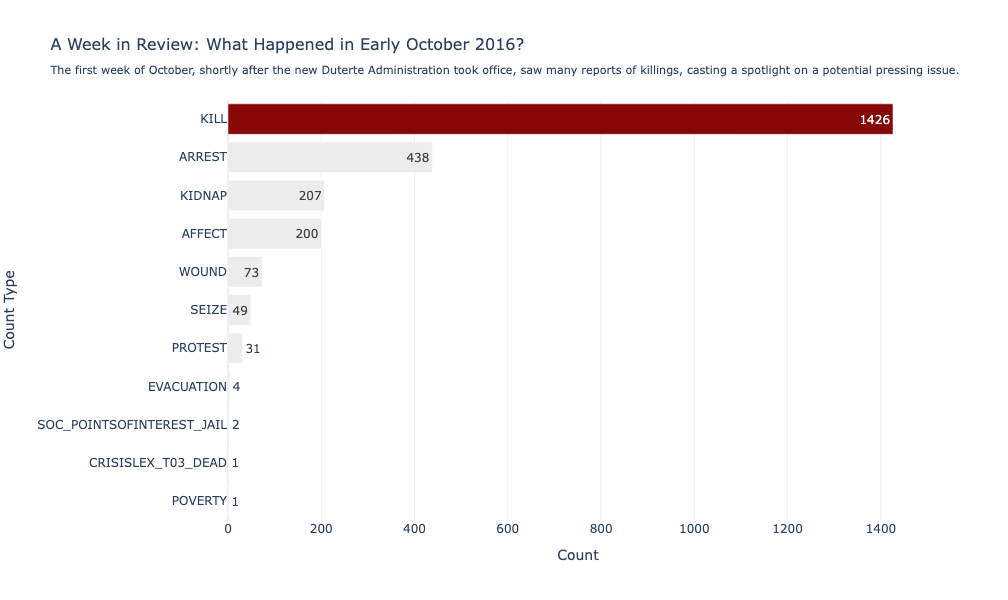

In [80]:
# Visualizing
# Extract the max count to highlight the corresponding bar
result_asc = result.sort_values(by="count", ascending=True)

# Extract the max count to highlight the corresponding bar
max_count = result_asc["count"].max()

# Define colors for each bar, highlighting the highest one
colors = ["#ECECEC" if count != max_count else '#880808'
          for count in result_asc["count"]]

# Initialize the figure
fig = go.Figure()

# Add a horizontal bar trace with dynamic colors
fig.add_trace(
    go.Bar(
        y=result_asc["CountType"],
        x=result_asc["count"],
        marker=dict(color=colors),
        text=result_asc["count"],
        orientation='h'
    )
)

# Set titles and labels
fig.update_layout(
    title=(
        "A Week in Review: What Happened in Early October 2016?<br>"
        "<sub>The first week of October, shortly after the new Duterte "
        "Administration took office, saw many reports of killings, casting a "
        "spotlight on a potential pressing issue.</sub>"
    ),
    title_font_size=16,
    xaxis_title="Count",
    yaxis_title="Count Type",
    width=1000,
    height=600,
    template="plotly_white",
)

# Show the plot
fig.show()

<b style='color:red'>PUT COMPARISON WITH AND TRANSITION TO 2015 SAME RANGE</b>

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">INSIGHTS</h1></center>
</div> 

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">RESULTS and DISCUSSIONS</h1></center>
</div> 

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">RECOMMENDATIONS</h1></center>
</div> 

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">SCOPE & LIMITATIONS</h1></center>
</div> 

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">CONCLUSION</h1></center>
</div>

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">REFERENCES</h1></center>
</div> 

The GDELT Project. (n.d.). [Web page]. Retrieved from https://www.gdeltproject.org/

Channel News Asia. (2022). Paid troll army for hire: Philippines' social media elections influencers. [Web page]. Channel News Asia. Retrieved from https://www.channelnewsasia.com/cna-insider/paid-troll-army-hire-philippines-social-media-elections-influencers-2917556

Rappler. (n.d.). Investigating troll farms: What to look out for. [Web page]. Retrieved from https://www.rappler.com/newsbreak/iq/investigating-troll-farms-what-to-look-out-for


<div style="background-color:BLUE ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">SCRATCH</h1></center>
</div> 

In [1]:
import os
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [2]:
spark = (SparkSession
     .builder
     .master('local[*]') # Master URL;
     .getOrCreate())

In [3]:
from pyspark.sql.types import (StructType, StructField, StringType,
IntegerType, FloatType, TimestampType, LongType)
import glob
# Define the schema—NOT FINAL; SHOULD REVISIT
schema = StructType([
    StructField("GKGRECORDID", StringType(), True),
    StructField("V2.1DATE", LongType(), True),
    StructField("V2SOURCECOLLECTIONIDENTIFIER", IntegerType(), True),
    StructField("V2SOURCECOMMONNAME", StringType(), True),
    StructField("V2DOCUMENTIDENTIFIER", StringType(), True),
    StructField("V1COUNTS", StringType(), True),
    StructField("V2.1COUNTS", StringType(), True),
    StructField("V1THEMES", StringType(), True),
    StructField("V2ENHANCEDTHEMES", StringType(), True),
    StructField("V1LOCATIONS", StringType(), True),
    StructField("V2ENHANCEDLOCATIONS", StringType(), True),
    StructField("V1PERSONS", StringType(), True),
    StructField("V2ENHANCEDPERSONS", StringType(), True),
    StructField("V1ORGANIZATIONS", StringType(), True),
    StructField("V2ENHANCEDORGANIZATIONS", StringType(), True),
    StructField("V1.5TONE", FloatType(), True),
    StructField("V2.1ENHANCEDDATES", StringType(), True),
    StructField("V2GCAM", StringType(), True),
    StructField("V2.1SHARINGIMAGE", StringType(), True),
    StructField("V2.1RELATEDIMAGES", StringType(), True),
    StructField("V2.1SOCIALIMAGEEMBEDS", StringType(), True),
    StructField("V2.1SOCIALVIDEOEMBEDS", StringType(), True),
    StructField("V2.1QUOTATIONS", StringType(), True),
    StructField("V2.1ALLNAMES", StringType(), True),
    StructField("V2.1AMOUNTS", StringType(), True),
    StructField("V2.1TRANSLATIONINFO", StringType(), True),
    StructField("V2EXTRASXML", StringType(), True)
])

# Define the path and file patterns for the first 8 days of August 2019
path = '/mnt/data/public/gdeltv2/gkg/'
file_pattern = '2019080[1-8]*.gkg.csv'  # Matches days 01 to 08

# Use glob to list files matching the pattern
files = glob.glob(path + file_pattern)

# Read the files into a DataFrame with the specified schema
df_gkg = spark.read.csv(files, sep='\t', schema=schema)

In [4]:
row_count = df_gkg.count()

In [5]:
print(f"The dataset has {row_count} rows.")

The dataset has 1436716 rows.


This is a sample of the dataset:

In [6]:
df_gkg.limit(3).toPandas()

,GKGRECORDID,V2.1DATE,V2SOURCECOLLECTIONIDENTIFIER,V2SOURCECOMMONNAME,V2DOCUMENTIDENTIFIER,V1COUNTS,V2.1COUNTS,V1THEMES,V2ENHANCEDTHEMES,V1LOCATIONS,...,V2GCAM,V2.1SHARINGIMAGE,V2.1RELATEDIMAGES,V2.1SOCIALIMAGEEMBEDS,V2.1SOCIALVIDEOEMBEDS,V2.1QUOTATIONS,V2.1ALLNAMES,V2.1AMOUNTS,V2.1TRANSLATIONINFO,V2EXTRASXML
0,20190801173000-0,20190801173000,1,newstoday.com.bd,http://www.newstoday.com.bd/?option=details&ne...,None,None,TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_ARABIC;T...,"TAX_FNCACT_JUDGES,1022;MEDIA_MSM,296;SOC_SLAVE...",1#Germany#GM#GM#51.5#10.5#GM;1#Chile#CI#CI#-30...,...,"wc:345,c1.1:2,c1.4:1,c12.1:29,c12.10:24,c12.12...",None,None,None,None,"1188|112||a richly imagined , engaging and poe...","Man Booker International,95;Edinburgh Universi...","2,previous collections of short,323;3,novels,3...",None,None
1,20190801173000-1,20190801173000,1,idrw.org,http://idrw.org/ms-velpari-takes-over-from-sun...,None,None,TAX_FNCACT;TAX_FNCACT_DIRECTOR;TAX_FNCACT_CHIE...,"TAX_FNCACT_CHIEF,275;EDUCATION,430;SOC_POINTSO...","4#Hindustan, India (General), India#IN#IN00#28...",...,"wc:168,c12.1:6,c12.10:14,c12.12:5,c12.13:4,c12...",None,None,None,https://youtube.com/channel/UChCONU0XnVC2671b7...,None,"Sunil Kumar,143;Tejas Division,322;Aircraft Pr...",None,None,<PAGE_AUTHORS>By</PAGE_AUTHORS>
2,20190801173000-2,20190801173000,1,willistonherald.com,https://www.willistonherald.com/news/oil_and_e...,"KILL#4000000##2#Colorado, United States#US#USC...","KILL#4000000##2#Colorado, United States#US#USC...",WB_507_ENERGY_AND_EXTRACTIVES;WB_1702_OILFIELD...,"WB_507_ENERGY_AND_EXTRACTIVES,25;WB_1702_OILFI...","2#Colorado, United States#US#USCO#39.0646#-105...",...,"wc:715,c1.2:6,c1.3:1,c12.1:47,c12.10:88,c12.11...",https://bloximages.chicago2.vip.townnews.com/w...,None,None,https://youtube.com/channel/UCHR2WhAPYJ6magx0g...,None,"Liberty Oilfield Services,26;Tier Four,2357","5,hydraulic fracturing fleets operating,30;23,...",None,<PAGE_AUTHORS>Ren&eacute;e Jean rjean@willisto...


## **How many different types of counts were made (e.g., how many arrests, protest)**?

In [33]:
# Create separate dataframes for PH and SEA countries
df_ph = (df_final
         .filter(F.col('Country').rlike('Philippines'))
        )

sea_countries = ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia",
                 "Myanmar", "Singapore", "Thailand", "Vietnam",
                 "East Timor"]

# Filtering the DataFrame for SEA countries
df_sea = (df_final
          .filter(F.col('Country').isin(sea_countries))
         )

In [13]:
df_final.limit(5).toPandas()

,GKGRECORDID,V2.1DATE,V2SOURCECOLLECTIONIDENTIFIER,V2SOURCECOMMONNAME,V2DOCUMENTIDENTIFIER,V1COUNTS,V2.1COUNTS,V1THEMES,V2ENHANCEDTHEMES,V1LOCATIONS,...,V2.1SOCIALVIDEOEMBEDS,V2.1QUOTATIONS,V2.1ALLNAMES,V2.1AMOUNTS,V2.1TRANSLATIONINFO,V2EXTRASXML,CountType,Region,Country,THEMES_SINGLE
0,20190801173000-0,20190801173000,1,newstoday.com.bd,http://www.newstoday.com.bd/?option=details&ne...,None,None,TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_ARABIC;T...,"TAX_FNCACT_JUDGES,1022;MEDIA_MSM,296;SOC_SLAVE...",1#Germany#GM#GM#51.5#10.5#GM;1#Chile#CI#CI#-30...,...,None,"1188|112||a richly imagined , engaging and poe...","Man Booker International,95;Edinburgh Universi...","2,previous collections of short,323;3,novels,3...",None,None,None,None,Germany,TAX_WORLDLANGUAGES
1,20190801173000-1,20190801173000,1,idrw.org,http://idrw.org/ms-velpari-takes-over-from-sun...,None,None,TAX_FNCACT;TAX_FNCACT_DIRECTOR;TAX_FNCACT_CHIE...,"TAX_FNCACT_CHIEF,275;EDUCATION,430;SOC_POINTSO...","4#Hindustan, India (General), India#IN#IN00#28...",...,https://youtube.com/channel/UChCONU0XnVC2671b7...,None,"Sunil Kumar,143;Tejas Division,322;Aircraft Pr...",None,None,<PAGE_AUTHORS>By</PAGE_AUTHORS>,None,Hindustan,India,TAX_FNCACT
2,20190801173000-2,20190801173000,1,willistonherald.com,https://www.willistonherald.com/news/oil_and_e...,"KILL#4000000##2#Colorado, United States#US#USC...","KILL#4000000##2#Colorado, United States#US#USC...",WB_507_ENERGY_AND_EXTRACTIVES;WB_1702_OILFIELD...,"WB_507_ENERGY_AND_EXTRACTIVES,25;WB_1702_OILFI...","2#Colorado, United States#US#USCO#39.0646#-105...",...,https://youtube.com/channel/UCHR2WhAPYJ6magx0g...,None,"Liberty Oilfield Services,26;Tier Four,2357","5,hydraulic fracturing fleets operating,30;23,...",None,<PAGE_AUTHORS>Ren&eacute;e Jean rjean@willisto...,KILL,Colorado,United States,WB_507_ENERGY_AND_EXTRACTIVES
3,20190801173000-3,20190801173000,1,9news.com,https://www.9news.com/article/life/style/color...,None,None,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"WB_137_WATER,339;LEADER,177;TAX_FNCACT_PRESIDE...",1#United States#US#US#39.828175#-98.5795#US;3#...,...,https://youtube.com/iframe_api?noext;https://y...,None,"United States,21;Centennial State,83;President...","20,attractions #x2014,395;41,parks,952;",None,<PAGE_LINKS>http://cpw.state.co.us/aboutus/Pag...,None,None,United States,LEADER
4,20190801173000-4,20190801173000,1,aninews.in,https://www.aninews.in/news/national/general-n...,None,None,GENERAL_GOVERNMENT;EPU_POLICY;EPU_POLICY_GOVER...,"GENERAL_HEALTH,232;GENERAL_HEALTH,285;GENERAL_...","4#Delhi, Delhi, India#IN#IN07#28.6667#77.2167#...",...,https://youtube.com/channel/UCtFQDgA8J8_iiwc5-...,None,"New Delhi,10;Lieutenant Governor Anil Baijal,1...","5,lakh Delhi government employees,47;",None,<PAGE_LINKS>https://www.aninews.in/search</PAG...,None,Delhi,India,GENERAL_GOVERNMENT


The final dataset with exploded count types, locations, and themes:

**Note:**
- not sure if `persist` makes the succeeding codes slower/faster but iirc it's supposed to optimize how the initial code of `df_final` is executed --> di na niya dinadaanan ulit.

In [12]:
df_final = (df_gkg
            .withColumn('CountType', F.regexp_extract('V1COUNTS', r'^([^#]+)',
                                                      1))
            .withColumn('ExpandedLocation',
                        F.explode(F.split(
                            F.regexp_extract('V1LOCATIONS', 
                                             r'(^|;)([^#]+#[^#]+#[^#]+)',
                                                   0), ";")))
            .withColumn('ExtractedLocation',
                        F.regexp_extract('ExpandedLocation',
                                         r'#([^#]+)#', 1))
            .withColumn('Region',
                        F.element_at(F.split(F.col('ExtractedLocation'),
                                             ', '), 1)) #Region: first element
            .withColumn('Country',
                        F.element_at(F.split(F.col('ExtractedLocation'),
                                             ', '), -1)) #Country: last element
            .withColumn('Region', F.when(F.col('Region') == F.col('Country'),
                                         None).otherwise(F.col('Region')))
            .withColumn('THEMES_SINGLE',
                        F.explode(F.split(F.regexp_extract('V1THEMES',
                                                           r'([^;]+)', 0),
                                          ";")))
            .drop('ExpandedLocation', 'ExtractedLocation') #Remove  columns
            # .persist()
           )


In [37]:
# Getting an error here idk why
(df_ph
 .groupBy('CountType')
 .count()
 .orderBy('count', ascending=False)
).toPandas()

Py4JJavaError: An error occurred while calling o330.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 38 in stage 21.0 failed 1 times, most recent failure: Lost task 38.0 in stage 21.0 (TID 1575) (localhost executor driver): org.apache.spark.SparkFileNotFoundException: File file:/mnt/data/public/gdeltv2/gkg/20190802154500.gkg.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:780)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:840)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: org.apache.spark.SparkFileNotFoundException: File file:/mnt/data/public/gdeltv2/gkg/20190802154500.gkg.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:780)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:840)
